# Proximal Policy Optimization Algorithm
### PPO agent using stable-baselines3


### Import required libraries

In [1]:
from source import *
from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import MlpPolicy
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt

### Environment - CartPole

In [2]:
env_name = 'CartPole-v1'

### Make an environment and test it

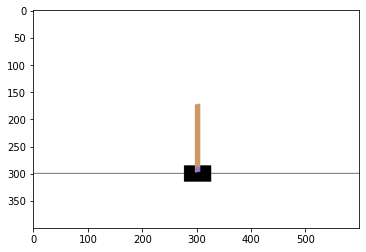

In [3]:
env = make_env(env_name)
env.reset()
plt.imshow(env.render("rgb_array"))
state_shape, n_actions = env.observation_space.shape, env.action_space.n
state_dim = state_shape[0]
env.close()

### Build a policy agent with PPO MlpPolicy

In [4]:
model = PPO(MlpPolicy, env, verbose=0)

### Test the untrained agent model

In [5]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

/home/ubuntu/venv/deep_rl/lib/python3.8/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward:9.18 +/- 0.68


### Train the agent

In [6]:
# train the agent for 20,000 steps
model.learn(total_timesteps=20_000)

### Evaluate the trained agent model

In [7]:
# evaluate the trained agent
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:879.34 +/- 518.09


### Record the agent on 'CartPole-v1' environment in length of 1000

In [8]:
record_video('CartPole-v1', model, video_length=1000, prefix='ppo2-cartpole', video_folder='videos/ppo')

Saving video to /media/ubuntu/uni/ai-applications/labs/lab03/videos/ppo/ppo2-cartpole-step-0-to-step-1000.mp4


### Task: try to improve the given agent and train another agent on a different environment